In this prokect, I will have a look at a dataset about Start-Up success and failure and try to find interesting insight 

In this section, we will modify the CSV to obtain a version that meets our needs.

Let's start by removing the columns that are not relevant to us.

In [14]:
#Importations 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import squarify


In [15]:
df = pd.read_csv("Start_Up.csv")


### **Column Overview:**
- **category_list**: Contains the industry sector of the start-up.  
- **funding_total_usd**: Contains the total value of funds raised.  
- **status**: Indicates the status of the start-up.  
- **country_code**: The country where the start-up is established.  
- **funding_rounds**: The number of funding rounds.  
- **founded_at**: The date of creation.  
- **first_funding_at**: The date of the first funding round.  
- **last_funding_at**: The date of the last funding round.  

We will now process these columns to ensure they are correctly formatted and usable.

The **category_list** column contains a large number of categories, with multiple categories assigned to some start-ups. To ensure a coherent analysis, we will:  

1. **Reduce the number of categories per start-up to just one.**  
2. **Simplify and consolidate categories to reduce overall category count.**  

This will allow for a clearer and more structured analysis of the data. Let's proceed with these modifications.

In [16]:


# We create a row for each category of every Start-Up in order to count the number of occurrences of each category.
df_exploded = df.assign(category_list=df["category_list"].str.split("|")).explode("category_list")

# We fill the missed information
df_exploded["category_list"] = df_exploded["category_list"].fillna("unknown").astype(str)

df["category_list"] = df["category_list"].fillna("unknown").astype(str)

category_counts = df_exploded["category_list"].value_counts()

# We only keep the most represented category for eache Start-UP
df["category_list"] = df["category_list"].apply(
    lambda x: max(x.split("|"), key=lambda cat: category_counts.get(cat, 0))
)

# Each Start-Up that had have a category that is represented less than 100 times in the dataset goes into an "Other" section
threshold = 100

category_counts = df["category_list"].value_counts()

df["category_list"] = df["category_list"].apply(lambda x: x if category_counts[x] >= threshold else "Other")

print("#of categories" , df["category_list"].nunique())

print(df["category_list"].value_counts())

#of categories 66
category_list
Software           8768
Mobile             4989
Other              4943
Biotechnology      4544
E-Commerce         3769
                   ... 
Cloud Computing     121
Nonprofits          118
Nanotechnology      111
Digital Media       103
Recruiting          103
Name: count, Length: 66, dtype: int64


We now have a total of 66 categories each containing at least 100 Start-Up, this column is now usable for analysis and modeling.

All the others columns are already good to use.

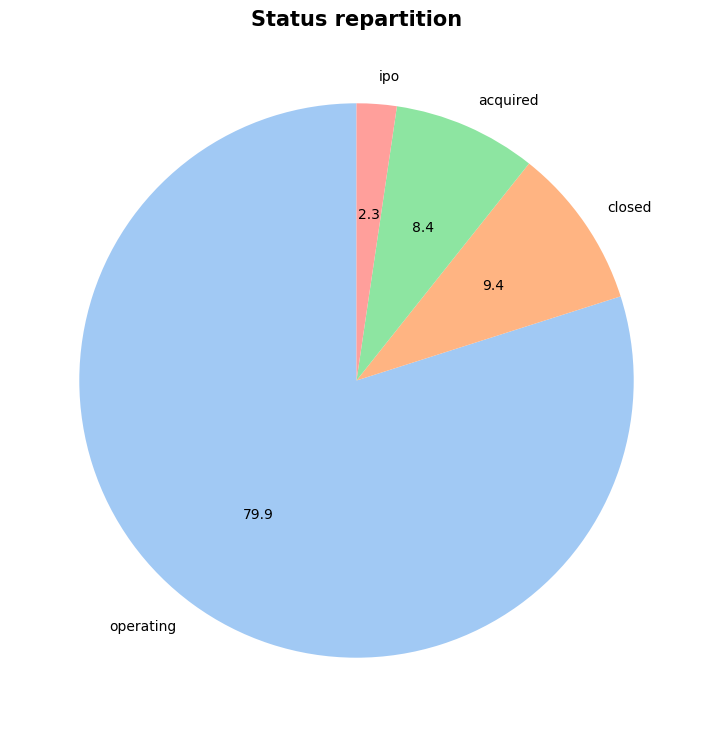

In [24]:
# Calculer les fréquences des valeurs de la colonne "status"
status_count = df["status"].value_counts()
colors = sns.color_palette("pastel", n_colors=len(status_count))
# Tracer le pie chart avec les labels et les pourcentages
plt.figure(figsize=(15, 9))
plt.pie(status_count, labels=status_count.index, autopct="%1.1f", startangle=90, colors=colors)
plt.title("Status repartition", fontsize = 15, fontweight = "bold")

plt.show()

High Operational Rate (79.9%) – A Sign of Bias?

Nearly 80% of startups in this dataset are still operational, which seems unusually high given real-world startup failure rates.
Possible Explanation: Survivorship bias. 

Let's start by having a look at the categories distributions

C:\Users\theof\AppData\Local\Temp\ipykernel_23936\1427704465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


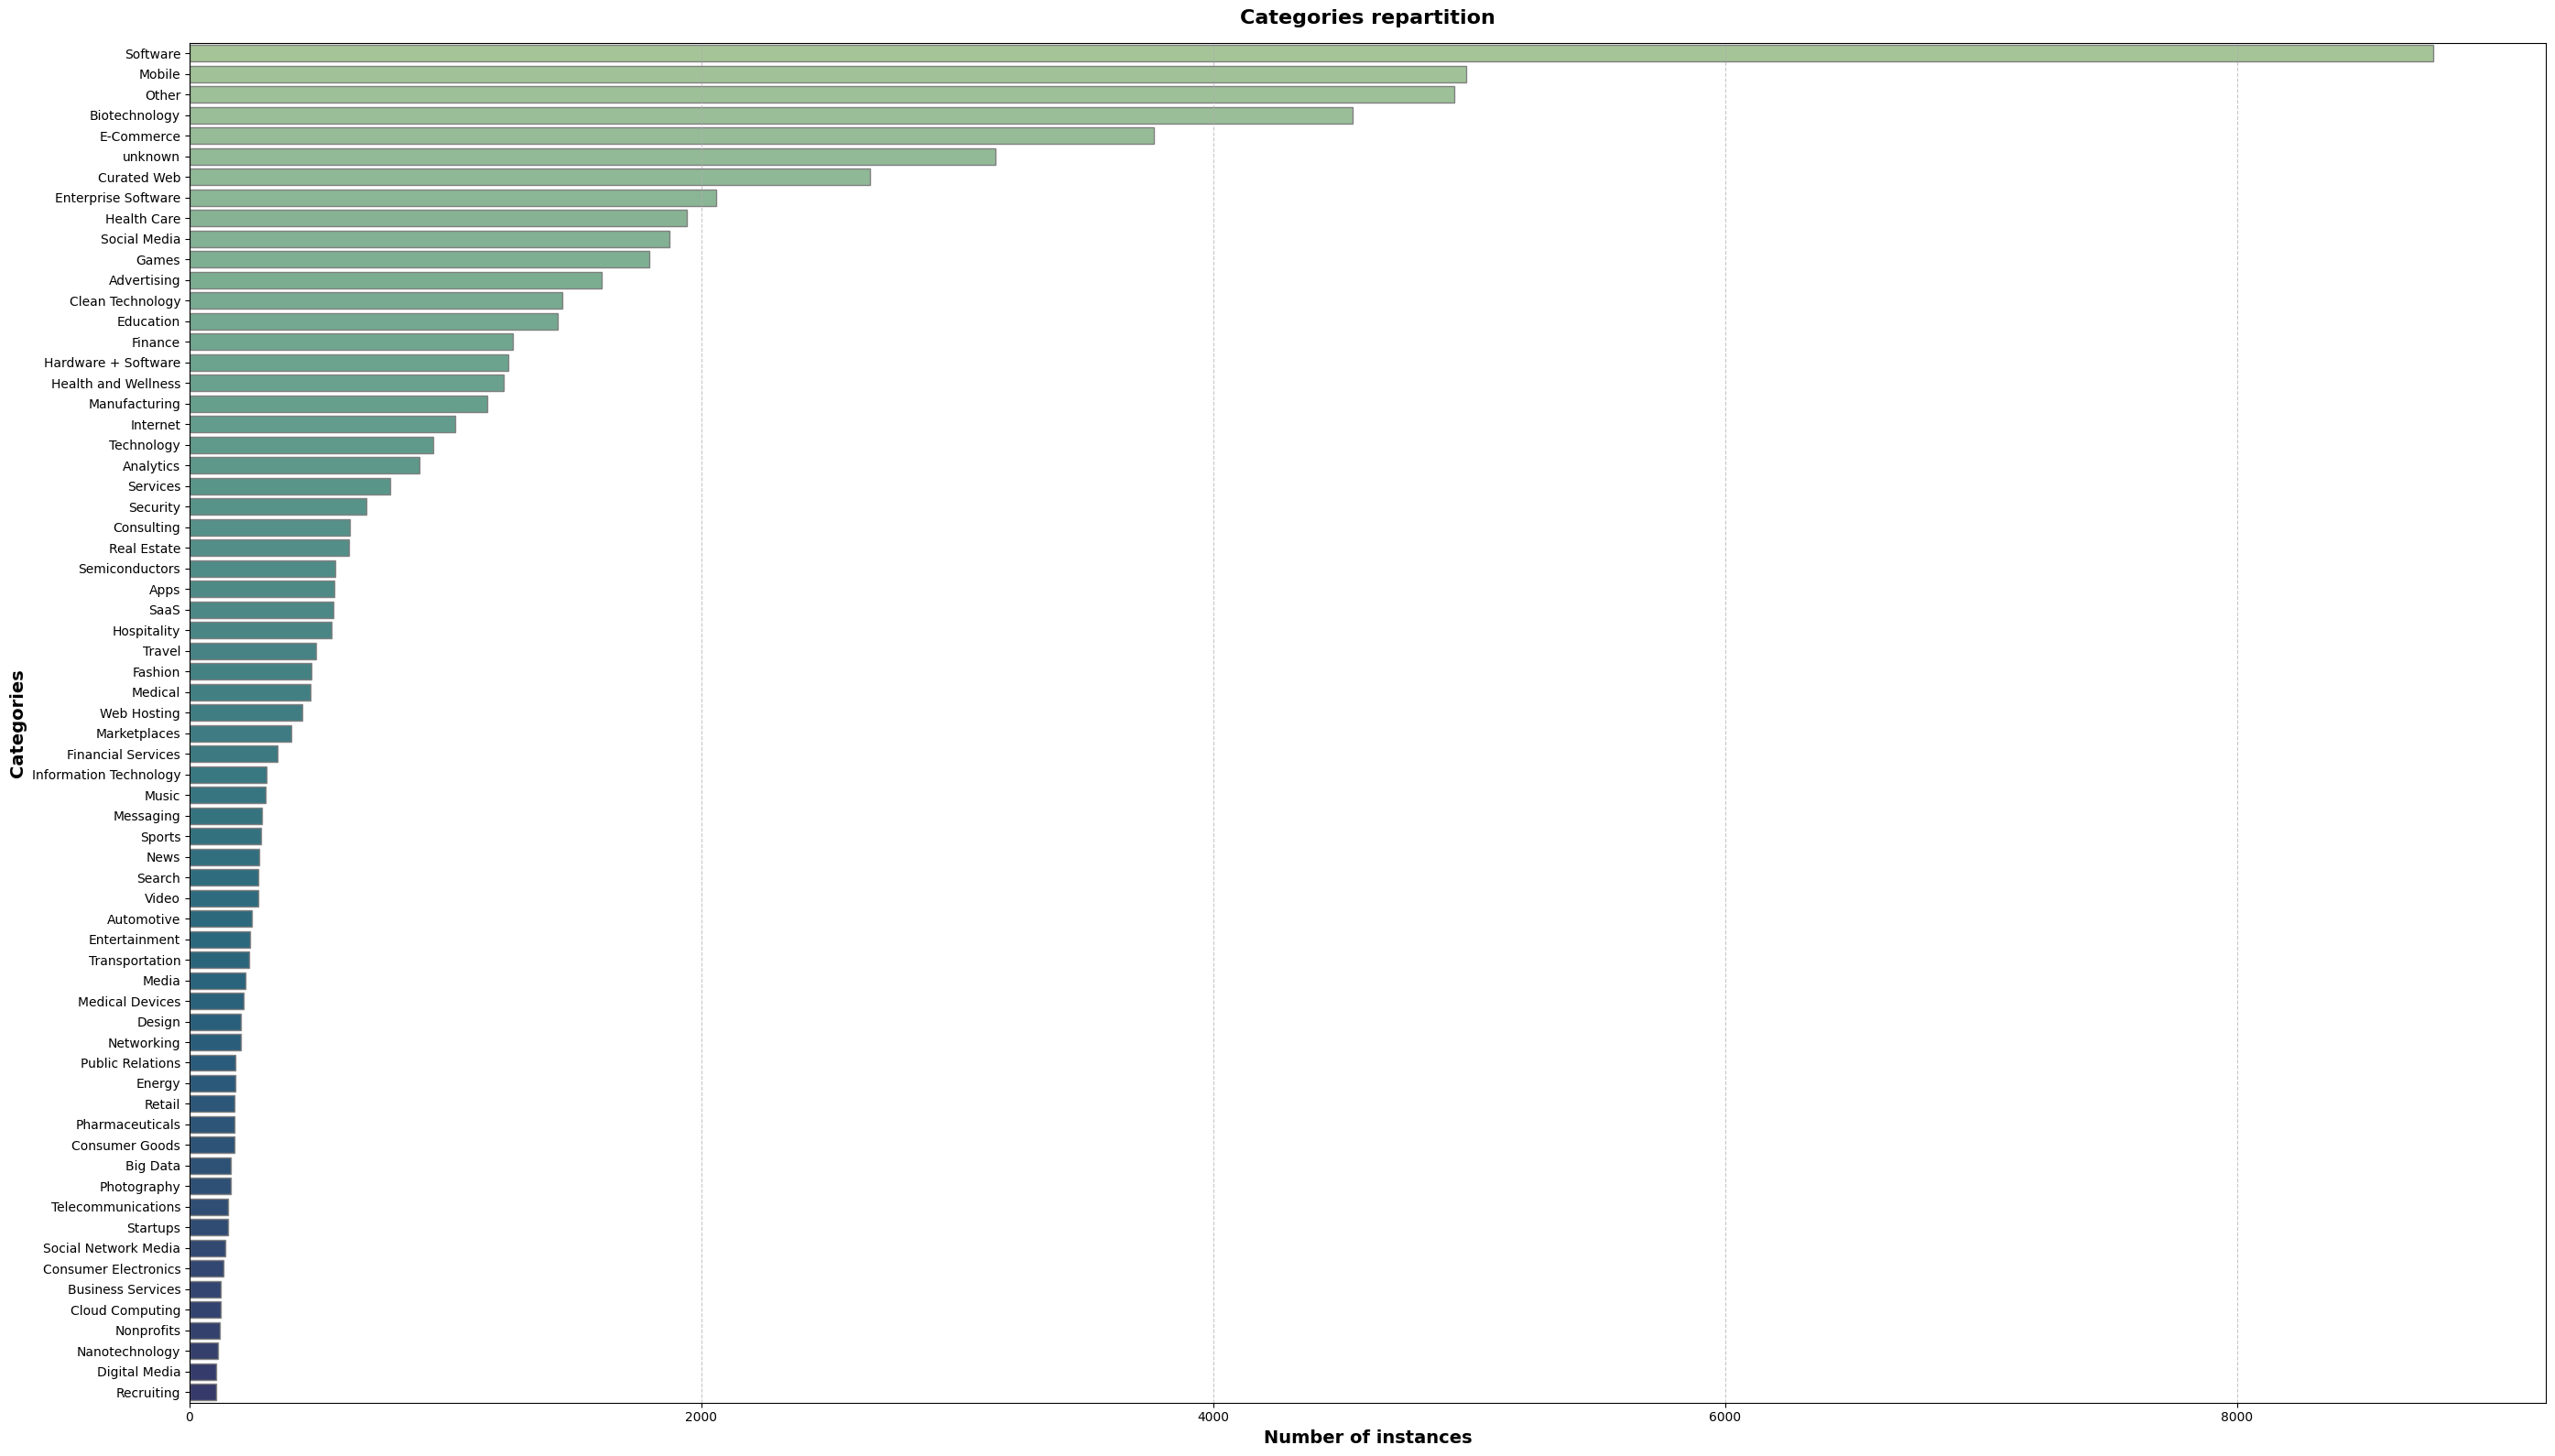

In [17]:
category_counts = df['category_list'].value_counts()



plt.figure(figsize=(28, 16))
sns.barplot(
    x=category_counts.values, 
    y=category_counts.index, 
    palette="crest", 
    edgecolor="grey",
)


plt.xlabel("Number of instances", fontsize=14, fontweight="bold")
plt.ylabel("Categories", fontsize=14, fontweight="bold")
plt.title("Categories repartition", fontsize=16, fontweight="bold", pad=15)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

This bar chart represents the distribution of startups across various industry categories in the dataset. Here are some key insights:

1️⃣ Dominance of the "Software" Category

The Software category has the highest representation, significantly outpacing all other categories.
This suggests that a large portion of startups in the dataset are technology-driven, likely offering software solutions, SaaS products, or enterprise applications.

2️⃣ Disparity Between Leading and Small Categories

The distribution follows a power law, where a few categories (Software, Mobile, E-Commerce) dominate, while many others have far fewer startups.
This is a typical pattern in startup ecosystems, where a few sectors attract most of the funding and activity.

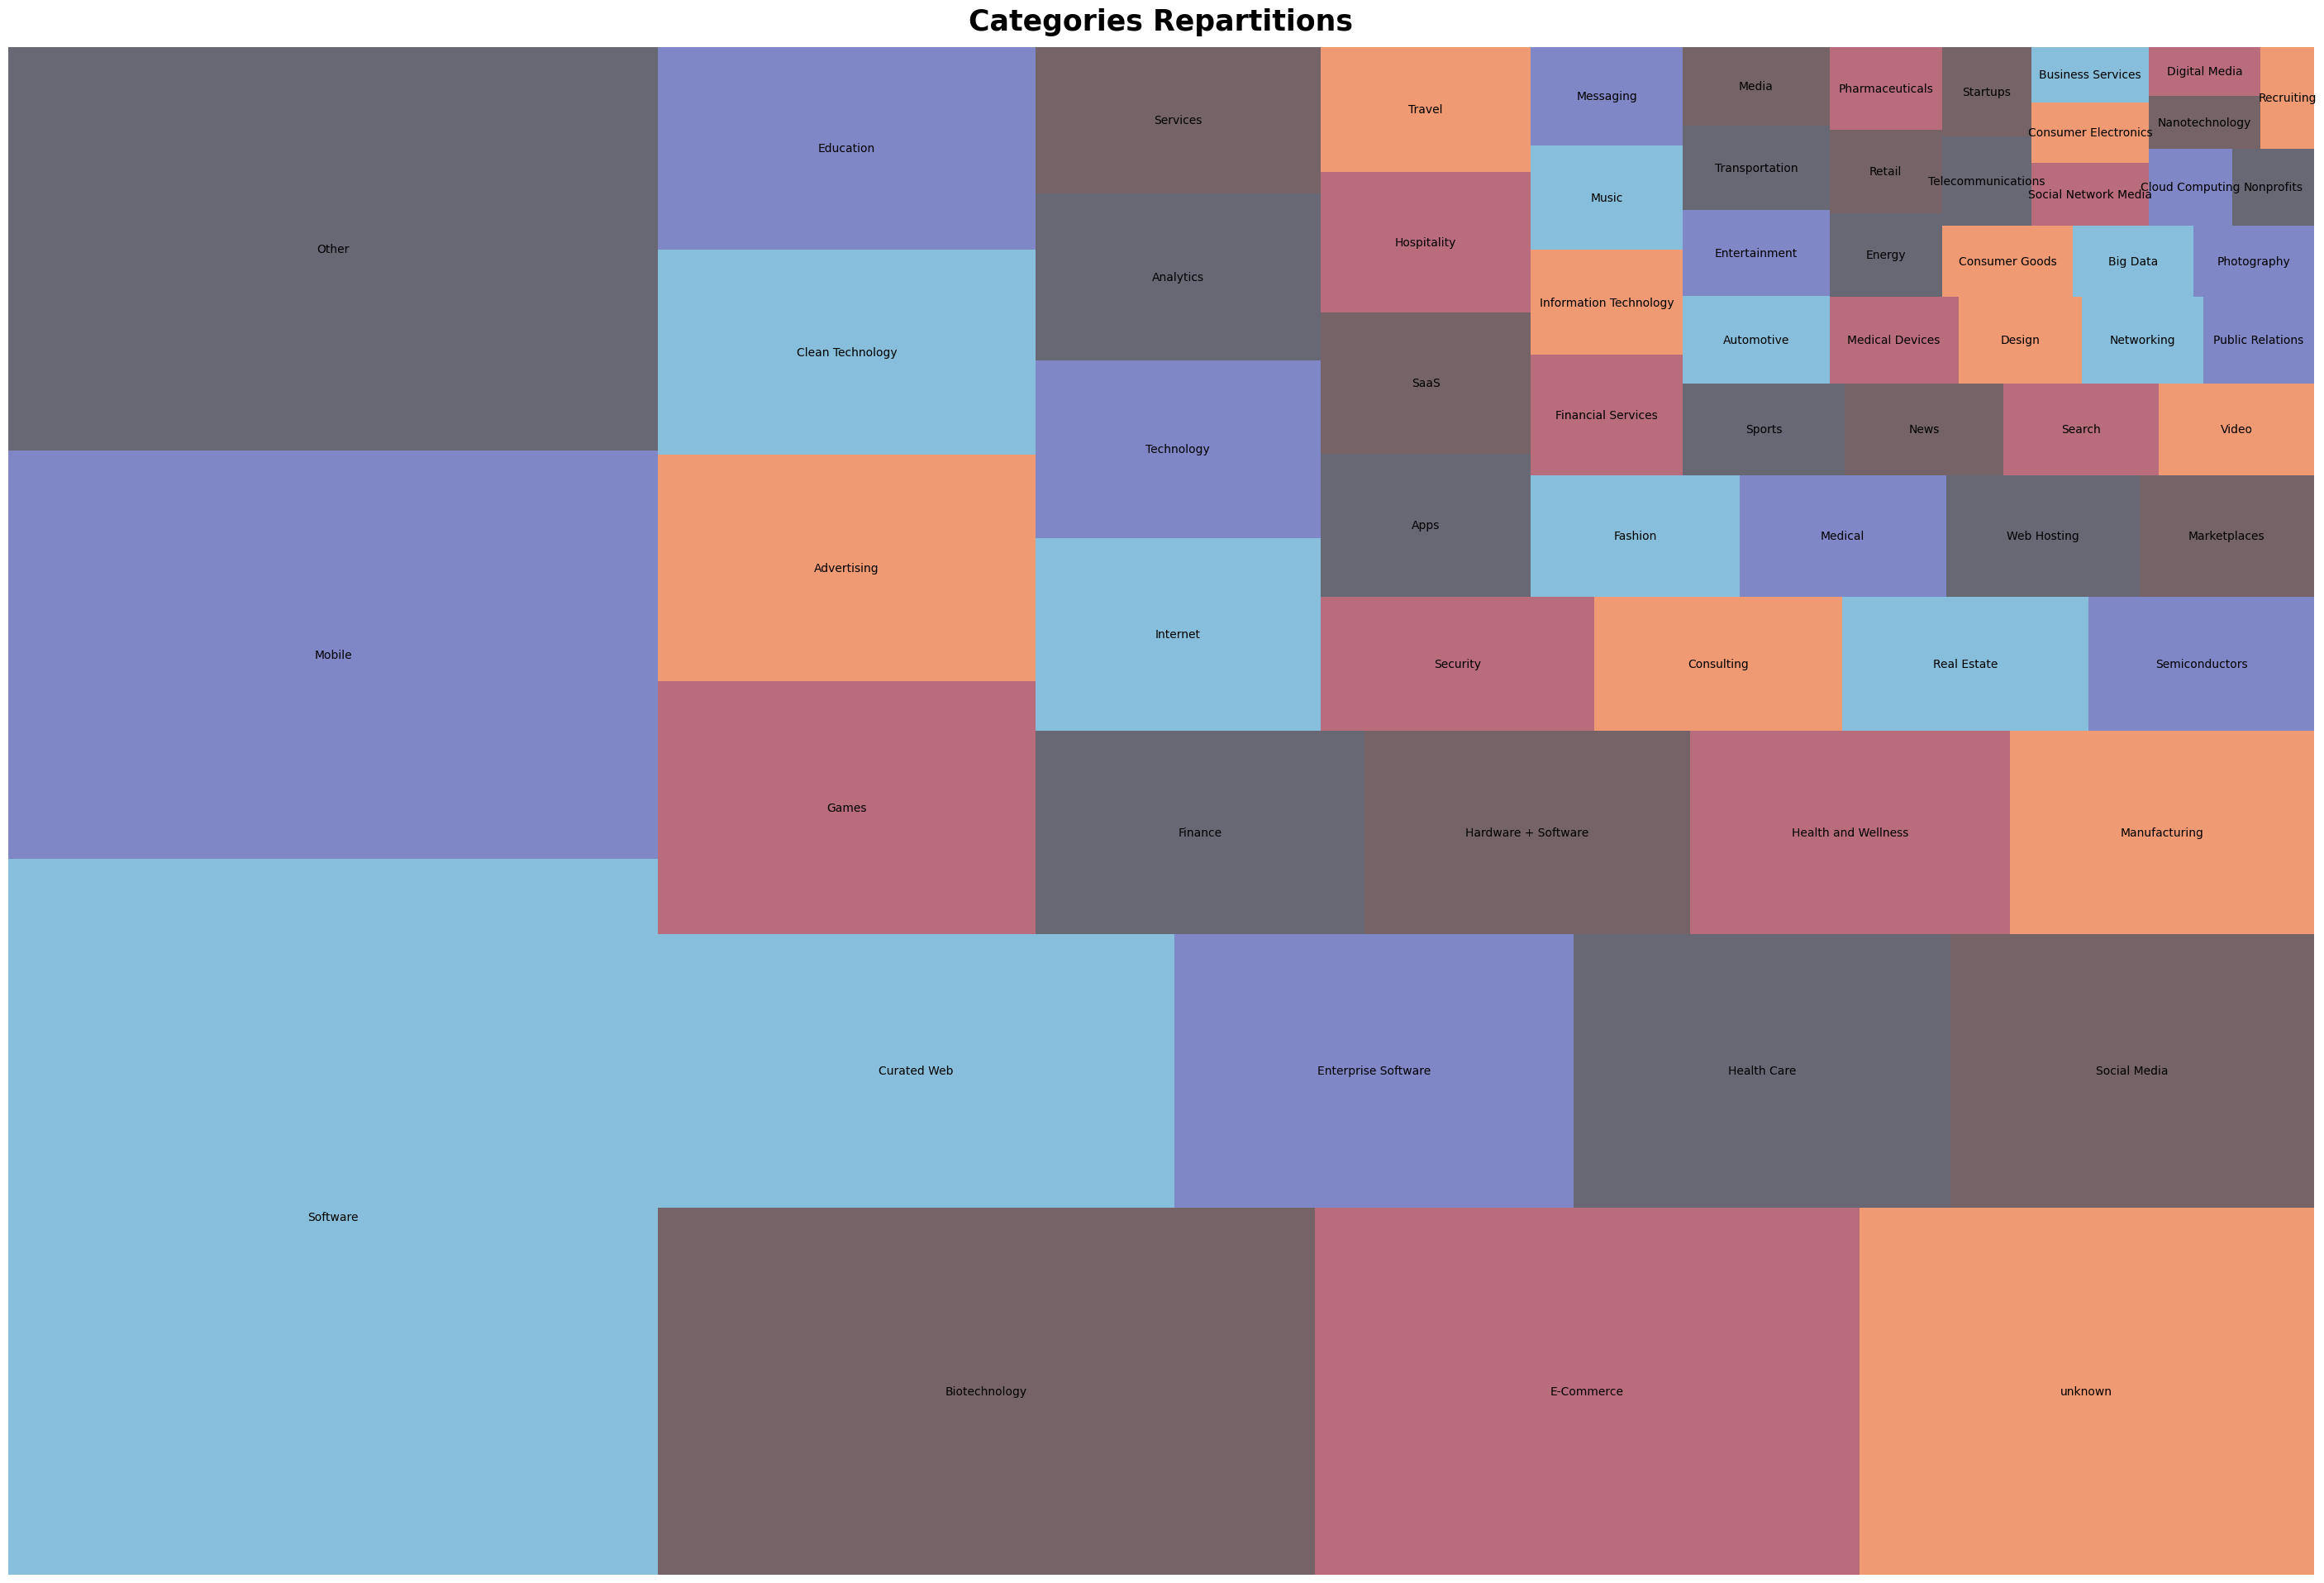

In [18]:
# Création d'une figure
colors = sns.color_palette("icefire")


plt.figure(figsize=(36, 24))
squarify.plot(sizes=category_counts, label=category_counts.index, alpha=0.7, color = colors)
plt.axis('off')
plt.title("Categories Repartitions",fontsize=25, fontweight="bold", pad=15)
plt.show()

Here is the same data displayed in a different way for representation purpose

12785


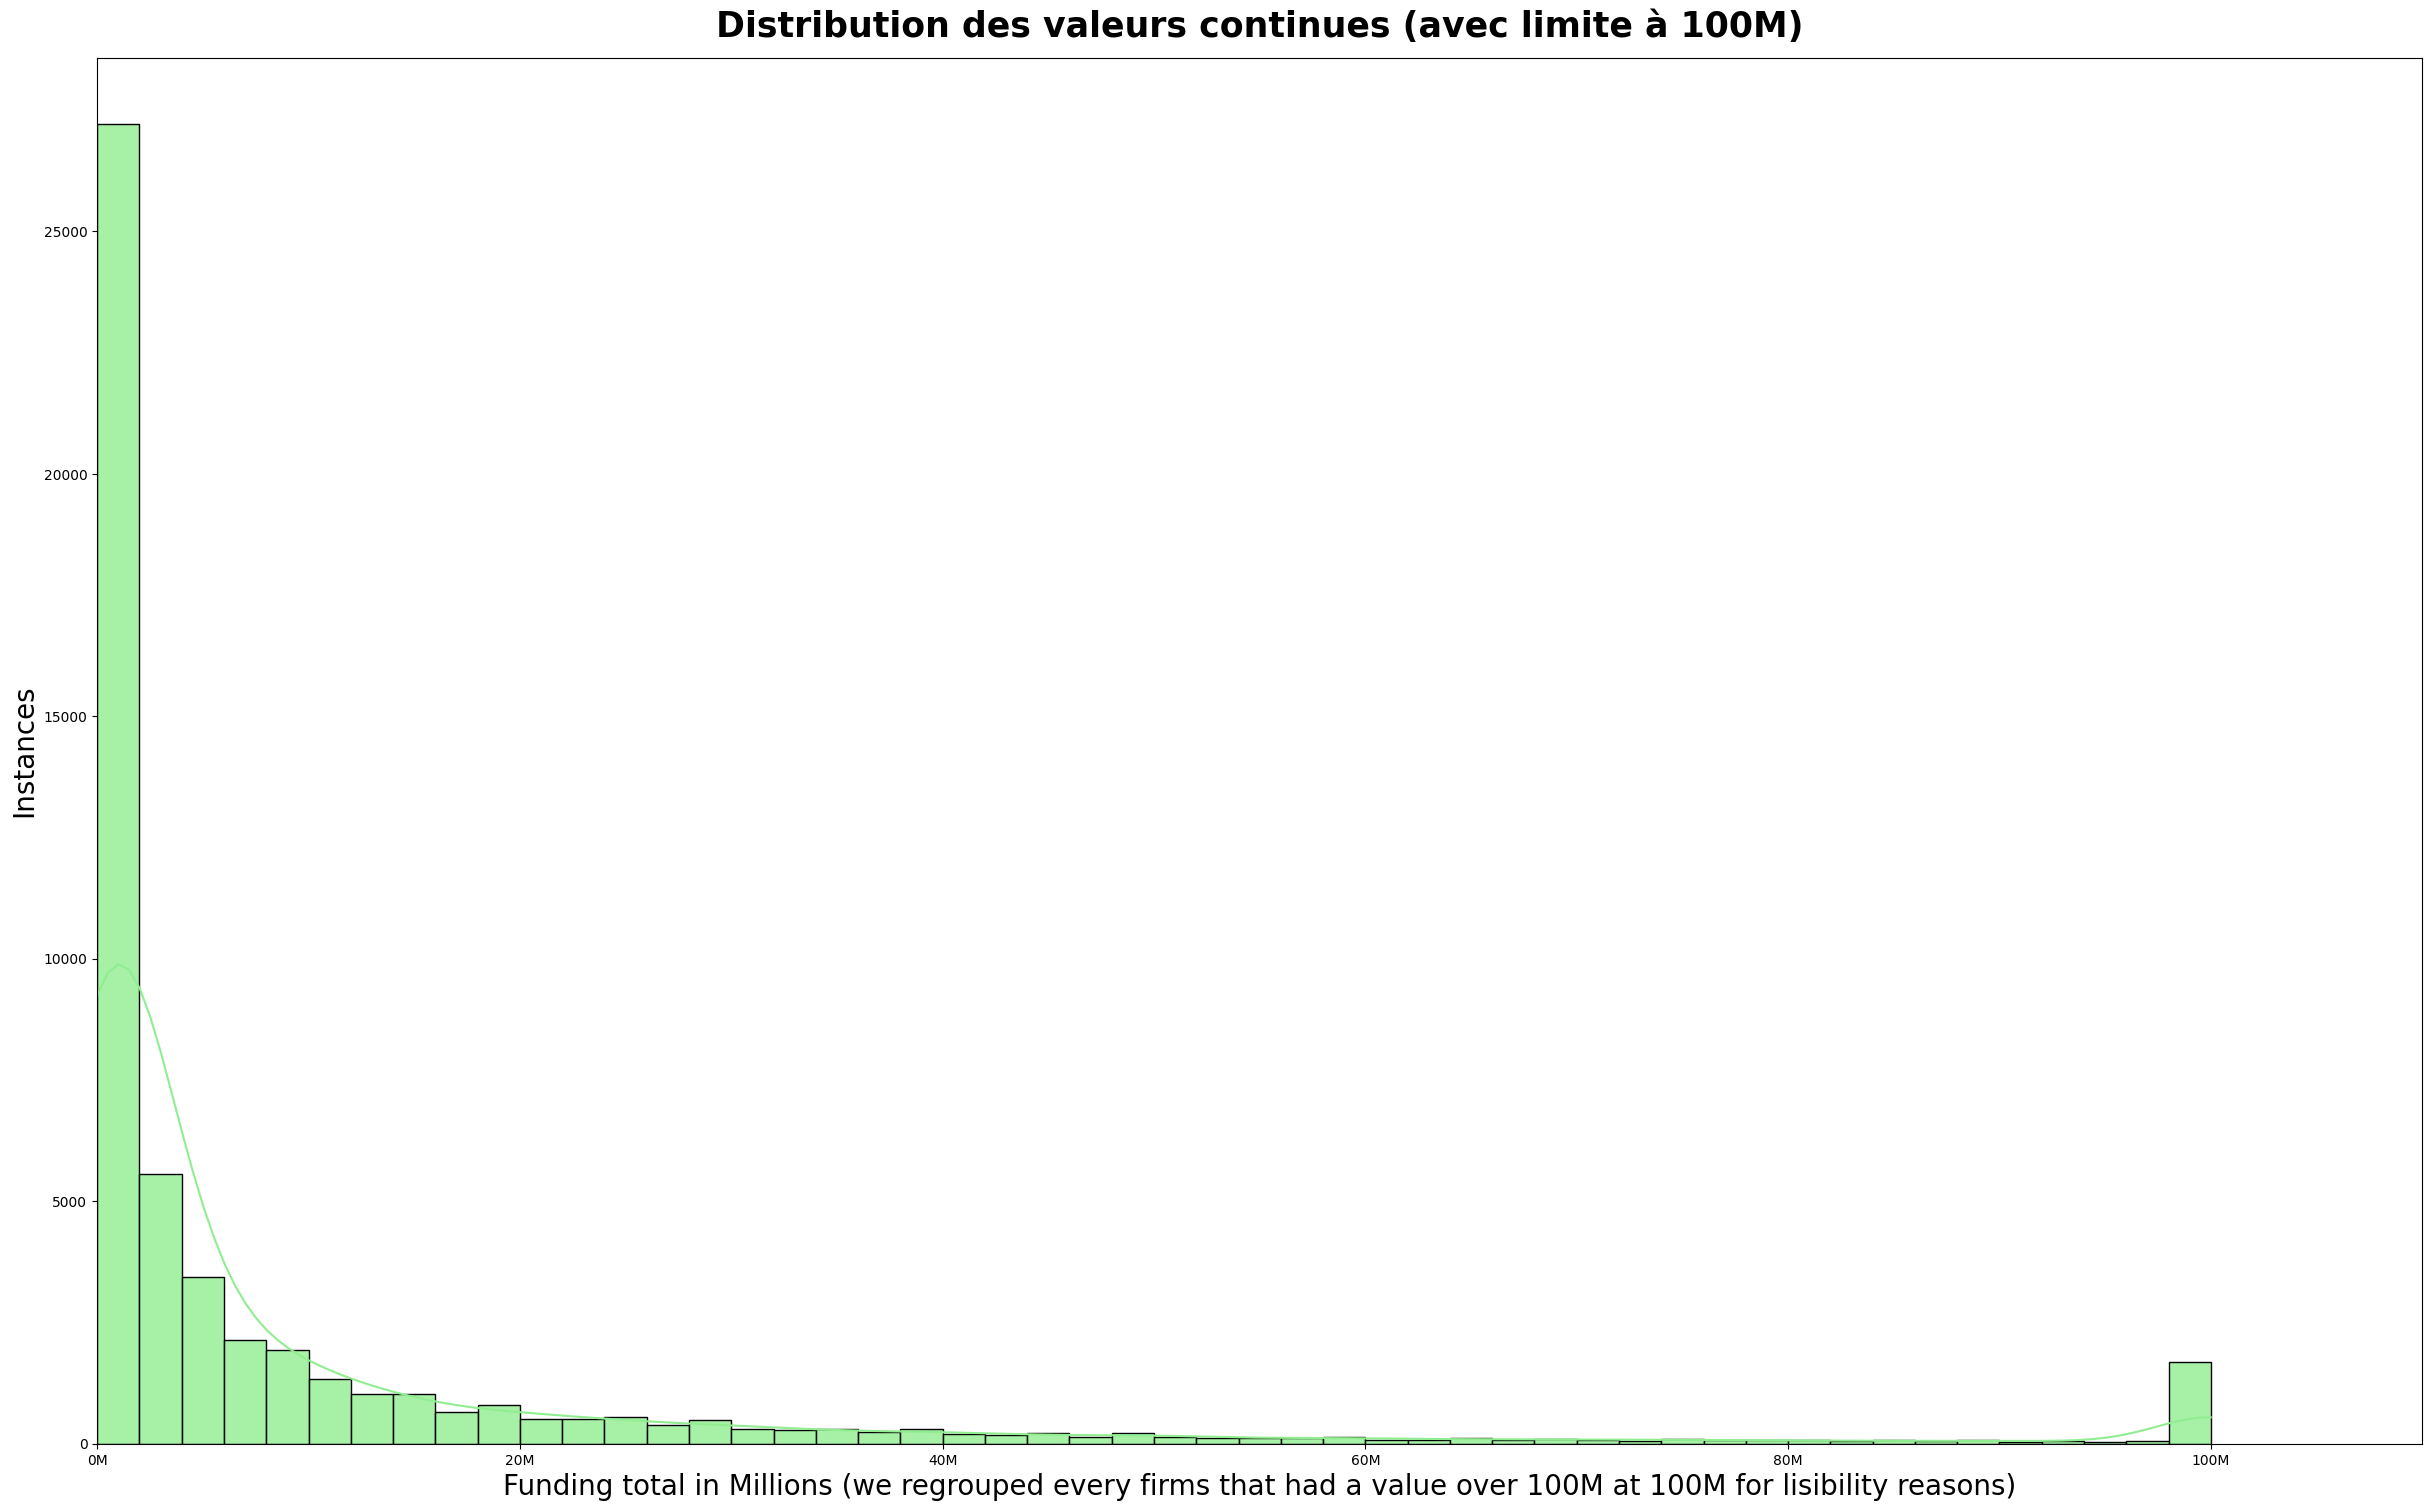

In [ ]:
df["funding_total_usd"] = pd.to_numeric(df["funding_total_usd"], errors="coerce")


plt.figure(figsize=(30, 18))

# Remplacer les valeurs > 100M uniquement pour l'affichage
sns.histplot(np.where(df["funding_total_usd"] > 100e6, 100e6, df["funding_total_usd"]),
             bins=50, kde=True, color = "lightgreen", alpha = 0.8)



# Reformater l’axe des X pour l’afficher en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xlim(0, 110e6)  # Définir un axe de 0 à 110M USD
plt.xlabel("Funding total in Millions (we regrouped every firms that had a value over 100M at 100M for lisibility reasons)", fontsize=20)
plt.ylabel("Instances", fontsize=20)
plt.title("Distribution des valeurs continues (avec limite à 100M)",fontsize=25, fontweight="bold", pad=15 )
plt.show()


This histogram represents the distribution of total funding amounts (in millions) across the startups in the dataset, with a cap at 100M for readability.

Key Observations:
1️⃣ Highly Skewed Distribution

The majority of startups have received very low funding, with a sharp decline in frequency as funding amounts increase.
This suggests that most startups in the dataset operate with limited investment, while only a few have secured substantial funding.
2️⃣ Long Tail Effect

The histogram shows a long right tail, meaning that a small number of companies have received exceptionally high funding (tens or even hundreds of millions).
This reflects a common trend in venture capital, where a few startups attract the majority of investments.
3️⃣ Clustering of Low-Funded Startups

The largest concentration of instances is near $0M to $5M, which suggests that early-stage or seed-funded startups dominate the dataset.
Most startups likely operate on small to medium-sized investments rather than large funding rounds.
4️⃣ Artificial Cap at $100M

Since startups with funding above $100M were grouped together, it’s possible that some outliers exist beyond this range.

This would be interesting to look at the distribution for the firms above 100M


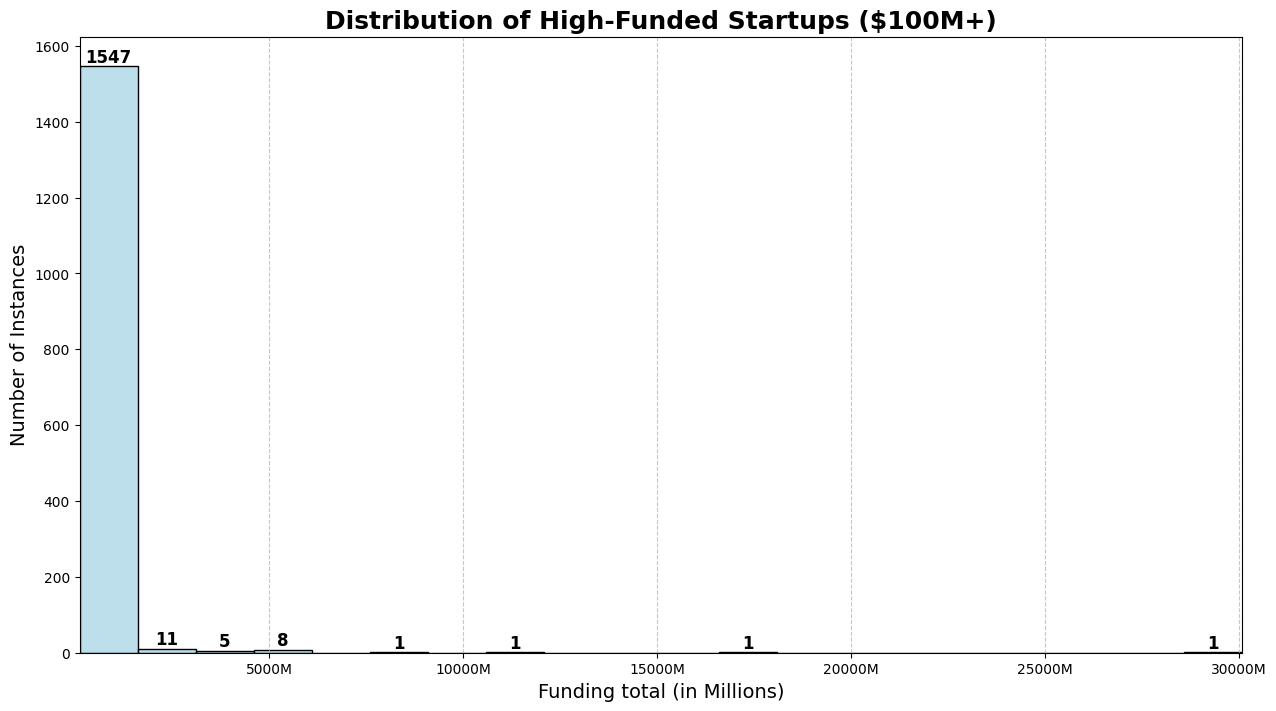

In [21]:
df_high_funding = df[df["funding_total_usd"] > 100e6]

# 🔹 Plot histogram for only high-funded startups
plt.figure(figsize=(15, 8))
ax = sns.histplot(df_high_funding["funding_total_usd"], bins=20, kde=False, color="lightblue", alpha=0.8)

# 🔹 Format X-axis in millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
plt.xlim(100e6, df_high_funding["funding_total_usd"].max() + 10e6)  # Start at 100M

# 🔹 Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Avoid empty bars
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2, height),  
                    ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

# 🔹 Improve chart appearance
plt.xlabel("Funding total (in Millions)", fontsize=14)
plt.ylabel("Number of Instances", fontsize=14)
plt.title("Distribution of High-Funded Startups ($100M+)", fontsize=18, fontweight="bold")
plt.grid(axis='x', linestyle="--", alpha=0.7)

plt.show()

1️⃣ Strong Skew Toward the Lower Bound ($100M-$200M)

A majority of high-funded startups (~1,547) fall into the lowest funding bracket ($100M-$200M).
This indicates that while these companies have received substantial investment, most do not exceed $200M in funding.
2️⃣ Very Few Startups Receive Extreme Funding Amounts ($5B+)

The number of startups significantly decreases as funding increases.
Only a handful of companies have raised over $5B, and even fewer exceed $10B.
This follows a power-law distribution, where a few outliers attract massive capital investments.

This insight is even more evident when looking at boxplots 

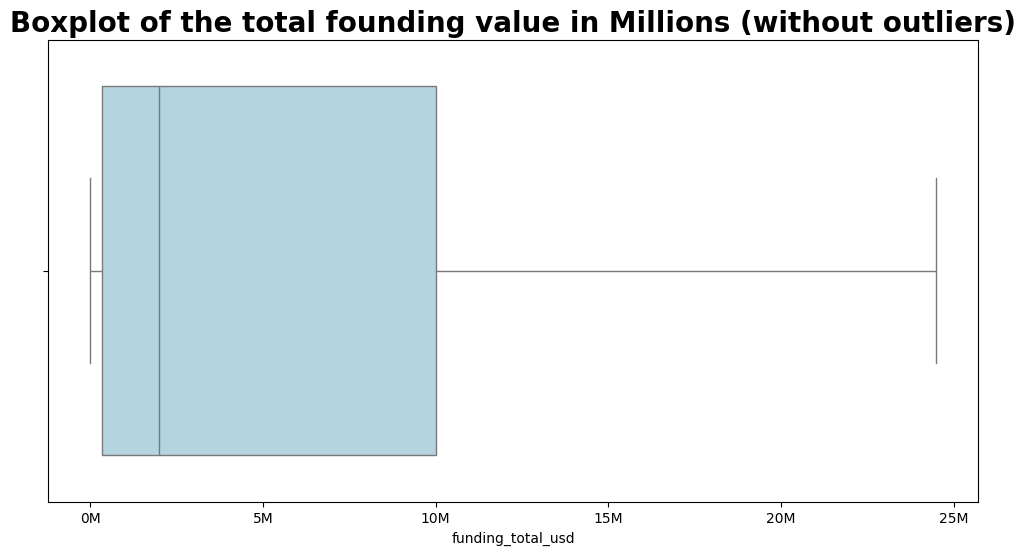

In [22]:
plt.figure(figsize=(12, 6))

# Afficher le boxplot sans les outliers
sns.boxplot(x=df["funding_total_usd"], showfliers=False, color='lightblue')

# Reformater l'axe des X en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

plt.title("Boxplot of the total founding value in Millions (without outliers)", fontsize = 20, fontweight="bold")

plt.show()

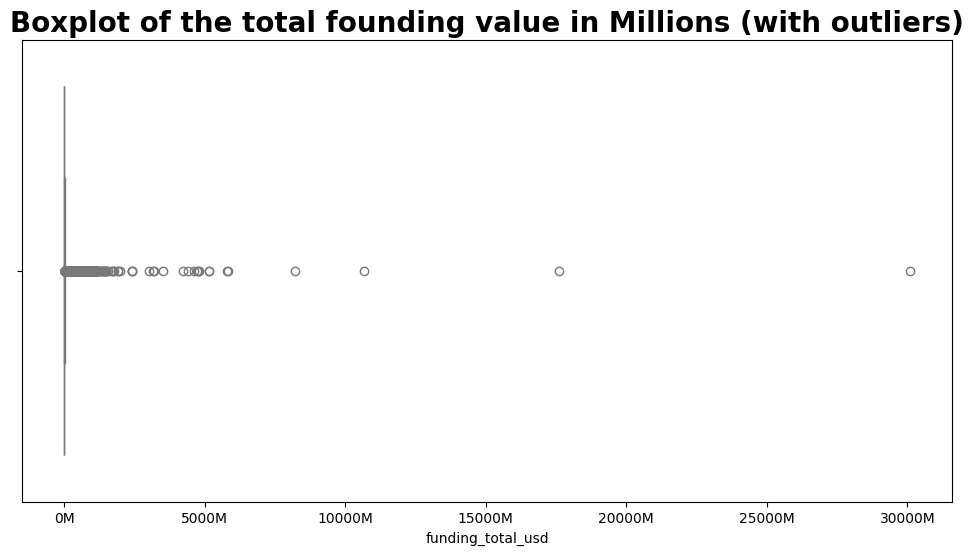

In [23]:
plt.figure(figsize=(12, 6))

# Afficher le boxplot sans les outliers
sns.boxplot(x=df["funding_total_usd"], showfliers=True, color='lightblue')

# Reformater l'axe des X en millions
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))


plt.title("Boxplot of the total founding value in Millions (with outliers)", fontsize = 20, fontweight="bold")

plt.show()

With this 2 boxplots we see that some outliers are absolutely extreme